In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

# Ecotox dataset

In [26]:
ecotox = pd.read_excel(r'data\\Data prepocess\\envirotox_20240201154635.xlsx')
ecotox = ecotox[(ecotox['Test statistic'] == 'EC50') & (ecotox['Duration (days)'] == 4)]

In [36]:
plt.style.use(["science", "no-latex"])

<Axes: xlabel='Trophic Level', ylabel='Count'>

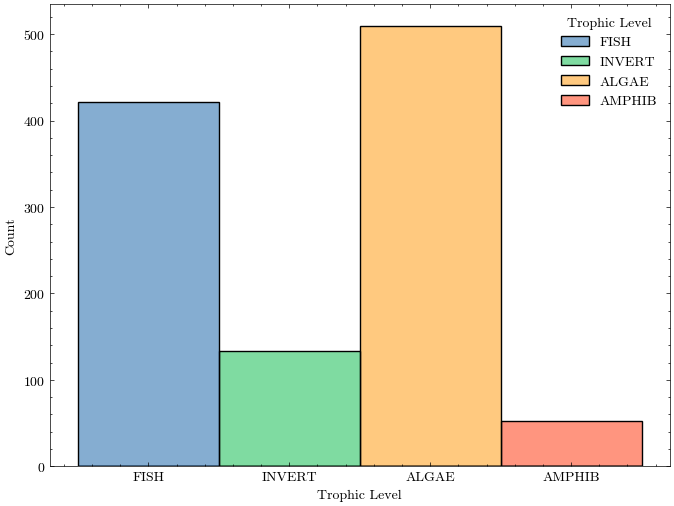

In [6]:
plt.style.use(["science", "no-latex"])
plt.figure(figsize=(8,6))
sns.histplot(data=ecotox.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='Trophic Level')

In [7]:
ecotox_classification = ecotox
ecotox_regression = ecotox[ecotox['Effect value'] <= 200]

<Axes: xlabel='Trophic Level', ylabel='Count'>

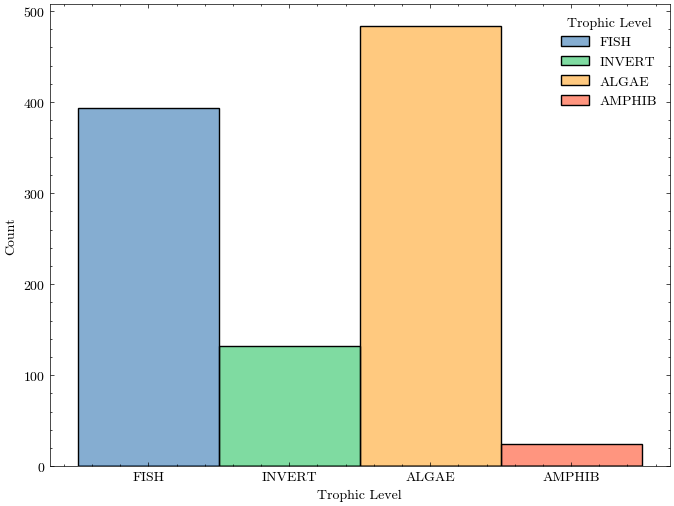

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data=ecotox_regression.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='Trophic Level')

In [27]:
flag = []
for i,row in ecotox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
ecotox.insert(0, 'flag', flag)

<Axes: xlabel='Trophic Level', ylabel='Count'>

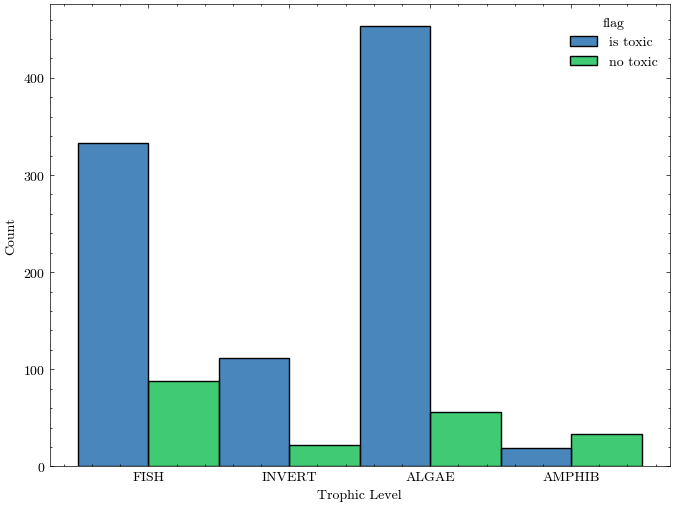

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data=ecotox.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='flag', multiple="dodge")

# Flags dataset

In [14]:
flags = pd.read_csv(r'data\\EC50_flags.csv')
new_column_list = [i for i in flags.columns if '─' in i]

<Axes: >

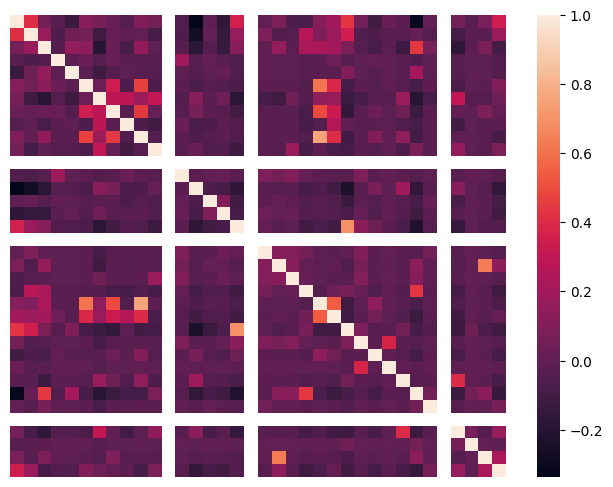

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(flags[new_column_list].corr(),  xticklabels=False, yticklabels=False)

In [16]:
import numpy as np
flags = pd.read_csv(r'data\\EC50_flags.csv')
column_list = [i for i in flags.columns if '─' in i]

corr_matrix = flags[column_list].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

flags.drop(to_drop, axis=1, inplace=True)
column_list = [i for i in flags.columns if '─' in i]
drop_list = []
for i in column_list:
    if flags[i].sum() == 0:
        drop_list.append(i)

flags.drop(drop_list, axis=1, inplace=True)

<Axes: >

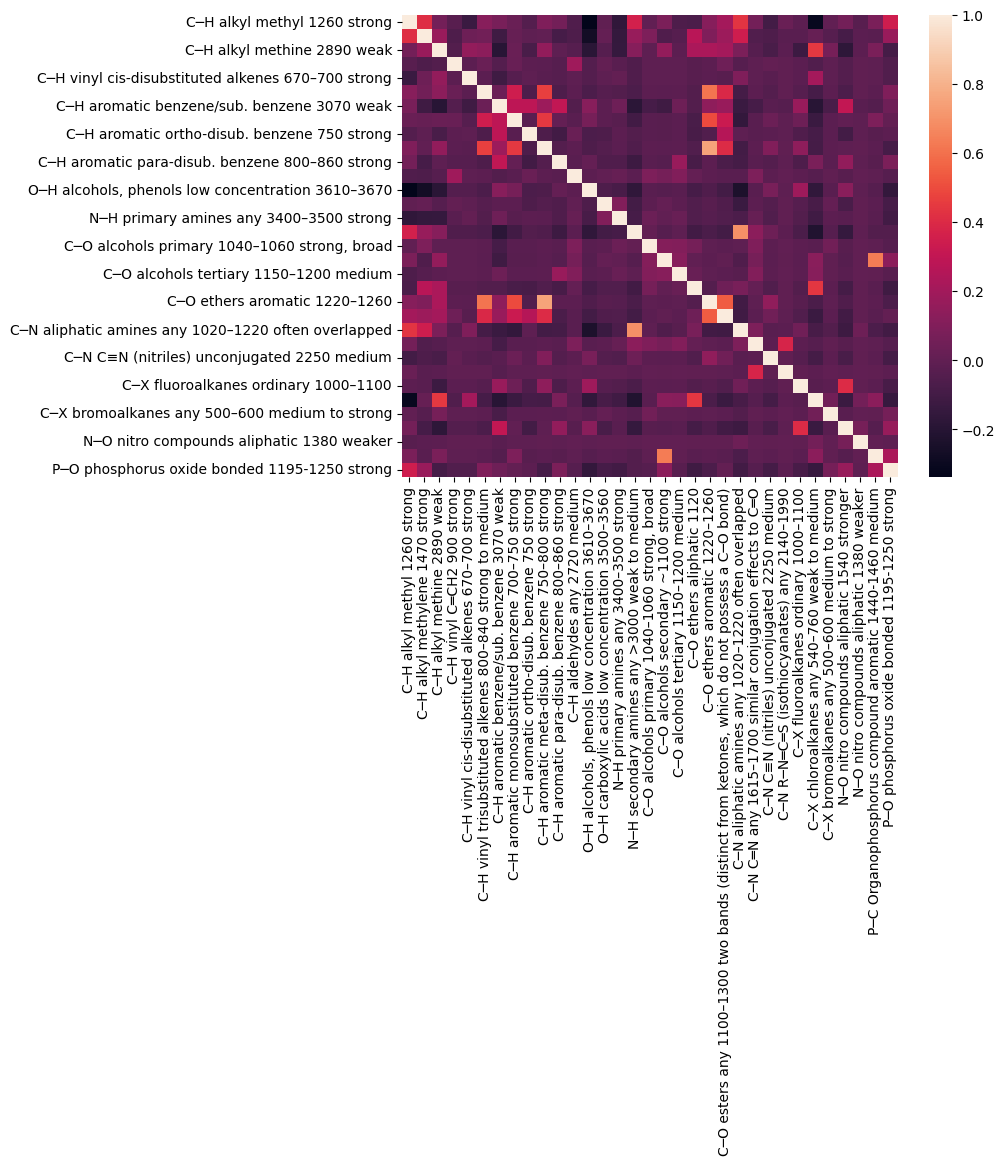

In [22]:
plt.figure(figsize=(8,6))
new_column_list = [i for i in flags.columns if '─' in i]
sns.heatmap(flags[new_column_list].corr(), xticklabels=False, yticklabels=False)

# Datasets

In [23]:
spectra_tox = pd.read_csv(r'data\\Spectra_tox.csv')
flags_tox = pd.read_csv(r'data\\EC50_flags.csv')

In [24]:
flag = []
for i,row in flags_tox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
flags_tox.insert(0, 'flag', flag)

In [28]:
data=flags_tox.drop_duplicates(subset='Chemical name')
data[(data['flag'] == 'is toxic') & (data['Trophic Level'] == 'ALGAE')].shape

(184, 94)

In [29]:
data[(data['flag'] == 'no toxic') & (data['Trophic Level'] == 'ALGAE')].shape

(28, 94)

Text(0.5, 1.0, 'Flags - Tox')

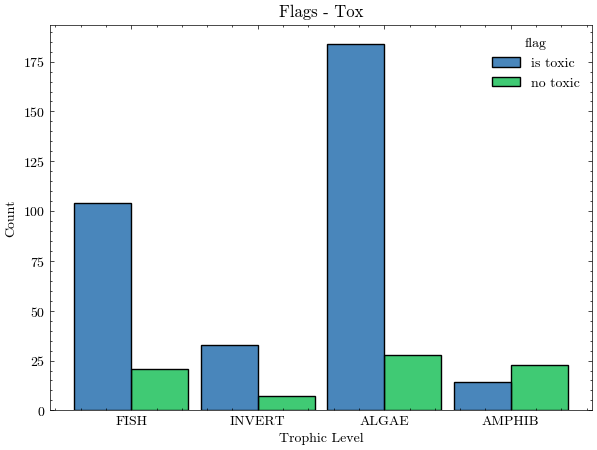

In [37]:
plt.figure(figsize=(7,5))
sns.histplot(data=flags_tox.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='flag', multiple="dodge", shrink=.9)
plt.title('Flags - Tox')

In [30]:
spectra_tox = pd.read_csv(r'data\\Spectra_tox.csv')
flag = []
for i,row in spectra_tox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
spectra_tox.insert(0, 'flag', flag)

In [31]:
data=spectra_tox.drop_duplicates(subset='Chemical name')
data[(data['flag'] == 'is toxic') & (data['Trophic Level'] == 'ALGAE')].shape

(102, 1820)

In [32]:
data[(data['flag'] == 'no toxic') & (data['Trophic Level'] == 'ALGAE')].shape

(23, 1820)

## Dataset Classification

Text(0.5, 1.0, 'Flags - Tox')

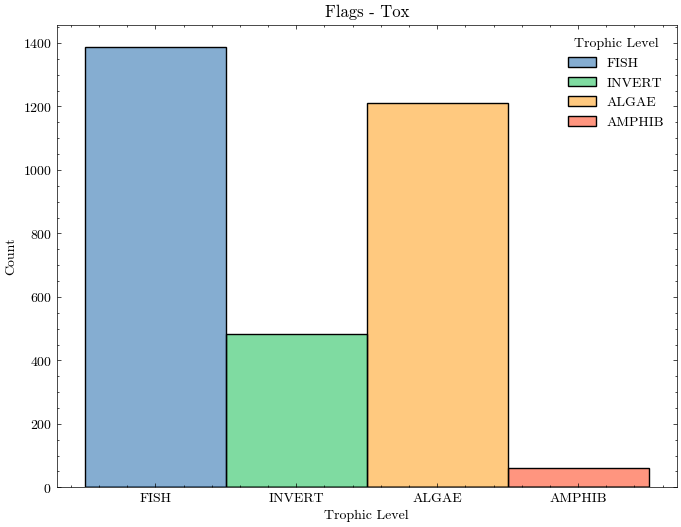

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(data=flags_tox, x='Trophic Level', hue='Trophic Level')
plt.title('Flags - Tox')

Text(0.5, 1.0, 'IR-spectra - Tox')

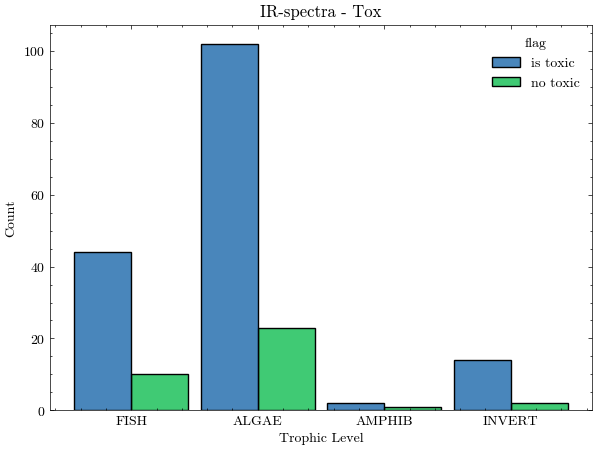

In [38]:
plt.figure(figsize=(7,5))
spectra_tox = pd.read_csv(r'data\\Spectra_tox.csv')
flag = []
for i,row in spectra_tox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
spectra_tox.insert(0, 'flag', flag)
data=spectra_tox.drop_duplicates(subset='Chemical name')
sns.histplot(data, x='Trophic Level', hue='flag', multiple="dodge", shrink=.9)
plt.title('IR-spectra - Tox')

## Dataset Regression

In [16]:
spectra_tox = spectra_tox[spectra_tox['Effect value'] <= 200]
flags_tox = flags_tox[flags_tox['Effect value'] <= 200]

Text(0.5, 1.0, 'IR-spectra - Tox')

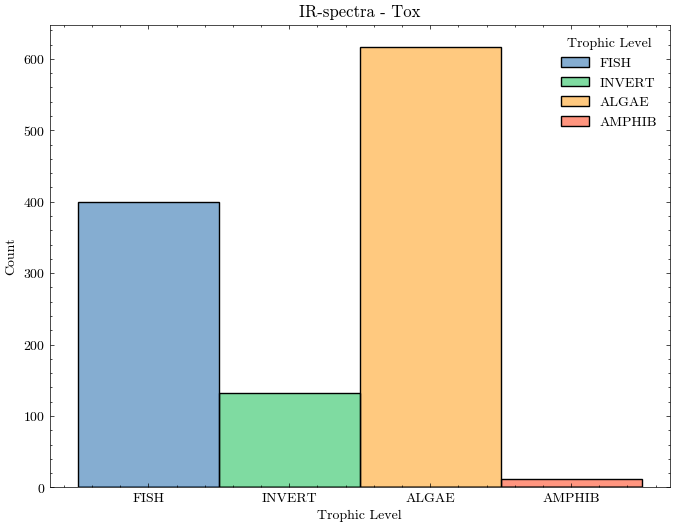

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data=spectra_tox, x='Trophic Level', hue='Trophic Level')
plt.title('IR-spectra - Tox')

In [18]:
spectra_tox[spectra_tox['Trophic Level'] == 'ALGAE'].shape

(616, 1819)

Text(0.5, 1.0, 'Flags - Tox')

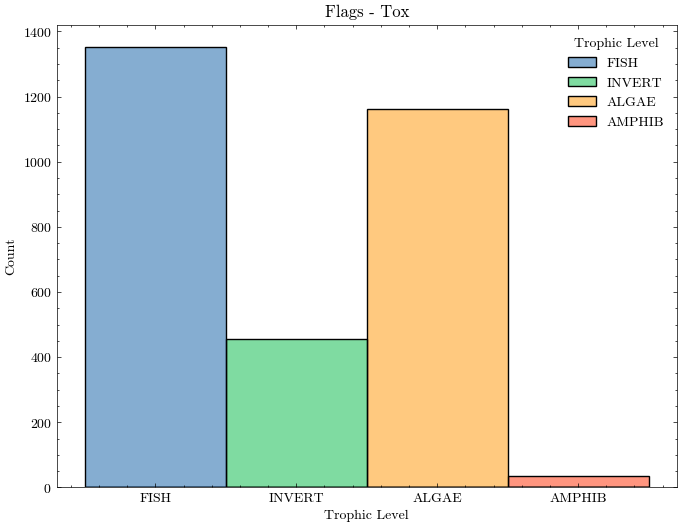

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data=flags_tox, x='Trophic Level', hue='Trophic Level')
plt.title('Flags - Tox')

In [20]:
flags_tox[flags_tox['Trophic Level'] == 'ALGAE'].shape

(1161, 93)